<a href="https://colab.research.google.com/github/FedericoBarona/AIDA/blob/main/58033_MEX_Barona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center">**Midterm Problem Set**</div> 



# Problem 1

##Purpose of the Dataset

The main purpose of collecting such a dataset is vital towards generating insights when the data is explored, cleaned and visualized. This collection of data can be used to provide credible information on business management. 


##Needs Statement

Businesses and Companies are in need of identifying and targeting ideal customers in order for them to generate maximum profit and revenue. 


##Significance for the Dataset

Generating customer personality dataset is important especially for businesses and companies who undergo marketing campaigns. The goal of producing such a dataset is to specify ideal customers based on the different features such as their needs, behavior and concerns.

Analysis of such data gives business and companies impressions and insights about perception of specific people/customers when it comes to buying their products, allowing store or business owners to modify their products based on their specific needs. In turn, identifying and targeting ideal customers can help them focus marketing their product towards a particular segment of customers.

##Importing of Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import seaborn as sns

##Importing of Dataset

In [ ]:
df= pd.read_csv("marketing_campaign - marketing_campaign.csv")
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


##Data Cleaning

### Remove unnecessary features

Z_CostContact & Z_Revenue were unnecessary because they contained the same values among all rows in the dataset. ID would also serve no purpose other than to show total number of customers in the dataset. 

There is also a clear outlier in the dataset that will have to be dropped to not mess with the data explorations, and calculations. 

In [ ]:
df = df.drop(["ID", "Z_CostContact", 'Z_Revenue'], axis=1) 
df = df[(df["Income"]<600000)]
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Changing date format to datetime

Changing the format of the feature "Dt_Customer" to the standardize datetime format for easier editing and organizing when used in the future.

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for data in df["Dt_Customer"]:
    data = data.date()
    dates.append(data)  
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Add Age feature nexto to year of birth

Age is calculated by taking current year minus (-) the year of birth registered in the dateset for each customer. The resulting Age is then added as a new feature within the dataset.

In [ ]:
df.insert(1, "Age", 2021-df["Year_Birth"], True)
df.head()

,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,64,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,67,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,56,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,37,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,40,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Add Total Spent Feature for Counting Amount of total spending for all items

Total_Spent feature considers all the listed spending for each customer in the dataset, considering the values for the features in wines, fruits, meat products, and fish products. This new feature will be used for a linear regression to be done below.

In [ ]:
Spent = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df.insert(15, "Total_Spent", Spent, True)
df.iloc[:, 9:16].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422


### Add Total Purchases Feature for Counting Amount of total purchase for all types

Follows the same logic as the Total_Spent feature but counts the total number of purchases through different possible forms available from the store.

In [ ]:
Purchase = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
df.insert(20, "Total_Purchase", Purchase, True)
df.iloc[:, 16:21].head() 

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchase
0,3,8,10,4,25
1,2,1,1,2,6
2,1,8,2,10,21
3,2,2,0,4,8
4,5,5,3,6,19


### Add Total Children Count

This feature counts the total number of children each customer has by adding the registered number of kids and teens in the dataset and placing it in a new feature. This will also later be used for linear regression. 

In [ ]:
df.insert(7, "Total_Children", df["Kidhome"] + df["Teenhome"], True)
df.head() 

,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Total_Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchase,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,64,Graduation,Single,58138.0,0,0,0,2012-04-09,58,635,88,546,172,88,88,1617,3,8,10,4,25,7,0,0,0,0,0,0,1
1,1954,67,Graduation,Single,46344.0,1,1,2,2014-08-03,38,11,1,6,2,1,6,27,2,1,1,2,6,5,0,0,0,0,0,0,0
2,1965,56,Graduation,Together,71613.0,0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,21,4,0,0,0,0,0,0,0
3,1984,37,Graduation,Together,26646.0,1,0,1,2014-10-02,26,11,4,20,10,3,5,53,2,2,0,4,8,6,0,0,0,0,0,0,0
4,1981,40,PhD,Married,58293.0,1,0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,19,5,0,0,0,0,0,0,0


### Drop rows with null entries

Finally, is the dropping of rows in the dataset that contain a null value.

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2215 non-null   int64         
 1   Age                  2215 non-null   int64         
 2   Education            2215 non-null   object        
 3   Marital_Status       2215 non-null   object        
 4   Income               2215 non-null   float64       
 5   Kidhome              2215 non-null   int64         
 6   Teenhome             2215 non-null   int64         
 7   Total_Children       2215 non-null   int64         
 8   Dt_Customer          2215 non-null   datetime64[ns]
 9   Recency              2215 non-null   int64         
 10  MntWines             2215 non-null   int64         
 11  MntFruits            2215 non-null   int64         
 12  MntMeatProducts      2215 non-null   int64         
 13  MntFishProducts      2215 non-nul

##Data Exploration

### Get Dataset Statistical Summary 

Getting the general Summary for all used Features in Dataset

In [ ]:
df.describe()

,Year_Birth,Age,Income,Kidhome,Teenhome,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchase,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,1968.816704,52.183296,51969.861400,0.441535,0.505643,0.947178,49.024379,305.225282,26.361625,167.063205,37.651016,27.040632,43.979684,607.321445,2.322799,4.085779,2.671783,5.802257,14.882619,5.318736,0.073589,0.074041,0.073138,0.064108,0.013544,0.009481,0.150339
std,11.987000,11.987000,21526.320095,0.536886,0.544198,0.749230,28.949608,337.345380,39.802036,224.311559,54.760822,41.077594,51.822660,602.925291,1.923820,2.741473,2.927179,3.250974,7.672246,2.425863,0.261160,0.261896,0.260421,0.245001,0.115614,0.096929,0.357484
min,1893.000000,25.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,44.000000,35284.000000,0.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,69.000000,1.000000,2.000000,0.000000,3.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51.000000,51373.000000,0.000000,0.000000,1.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,25.000000,397.000000,2.000000,4.000000,2.000000,5.000000,15.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,62.000000,68487.000000,1.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.500000,50.000000,33.000000,56.000000,1048.000000,3.000000,6.000000,4.000000,8.000000,21.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,128.000000,162397.000000,2.000000,2.000000,3.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,44.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Show count of unique values for each feature in dataset

In [ ]:
df.nunique()

Year_Birth               59
Age                      59
Education                 5
Marital_Status            8
Income                 1973
Kidhome                   3
Teenhome                  3
Total_Children            4
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
Total_Spent            1047
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
Total_Purchase           39
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

### Get Unique Values for Certain Features

In [ ]:
df["Marital_Status"].value_counts()

Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [ ]:
df["Kidhome"].value_counts()

0    1283
1     886
2      46
Name: Kidhome, dtype: int64

In [ ]:
df["Teenhome"].value_counts()

0    1146
1    1018
2      51
Name: Teenhome, dtype: int64

##Data Visualization.

### Heatmap of Correlations
A Heatmap of all the correlations between all of the features.

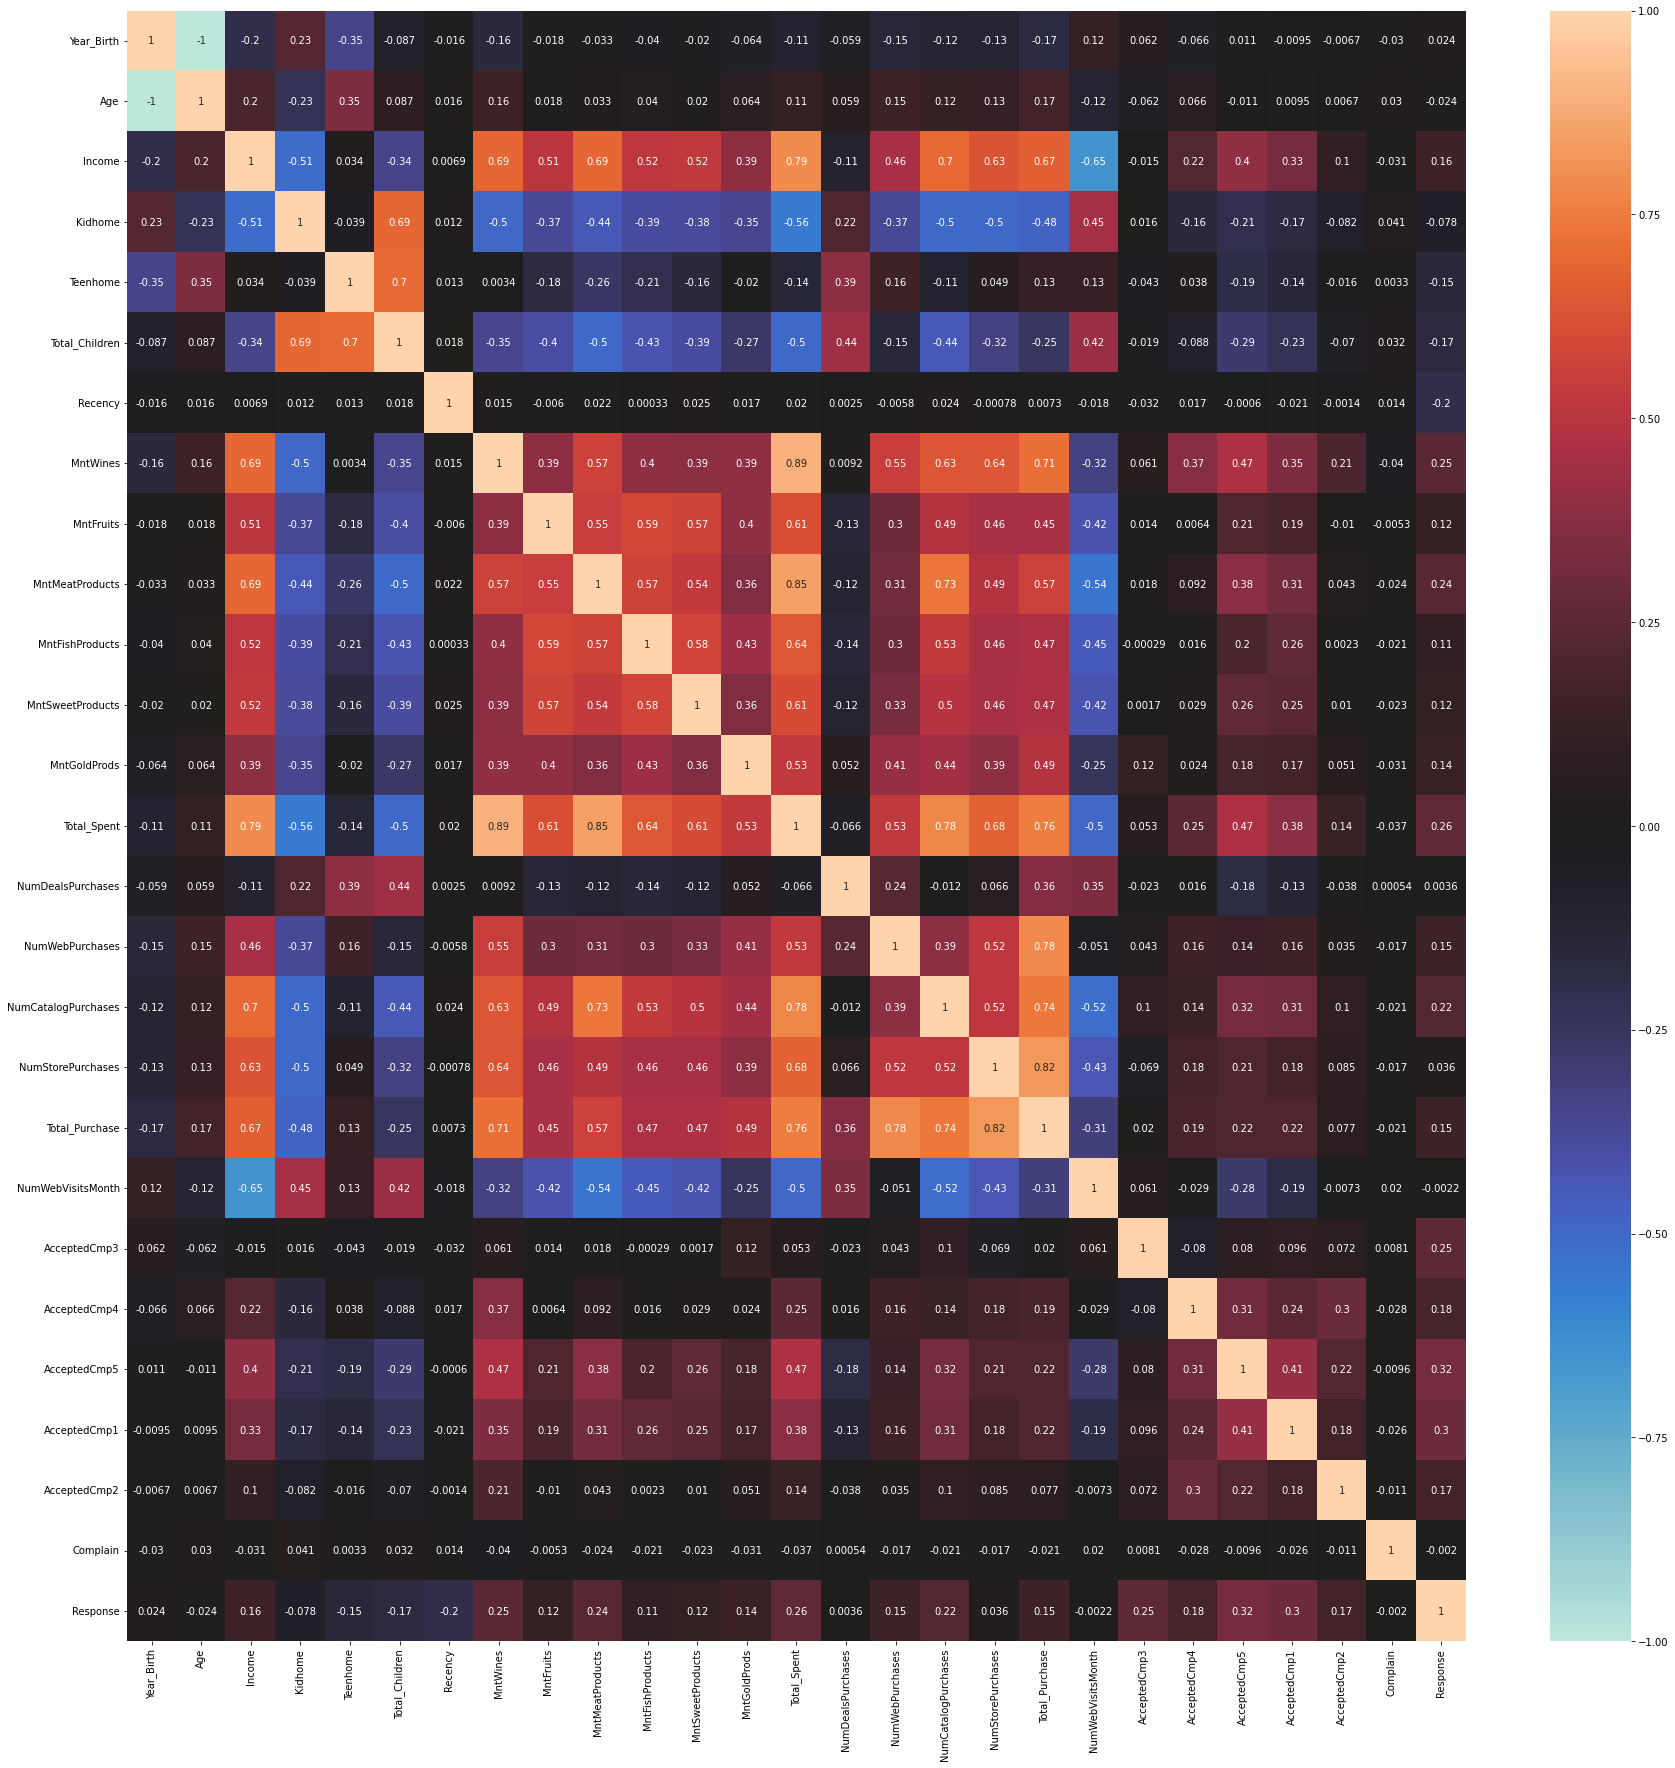

In [ ]:
plt.figure(figsize=(30,30)) 
sns.heatmap(df.corr(),annot=True, center=0)

### Pairplot

A Pairplot for specific features in the dataset

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

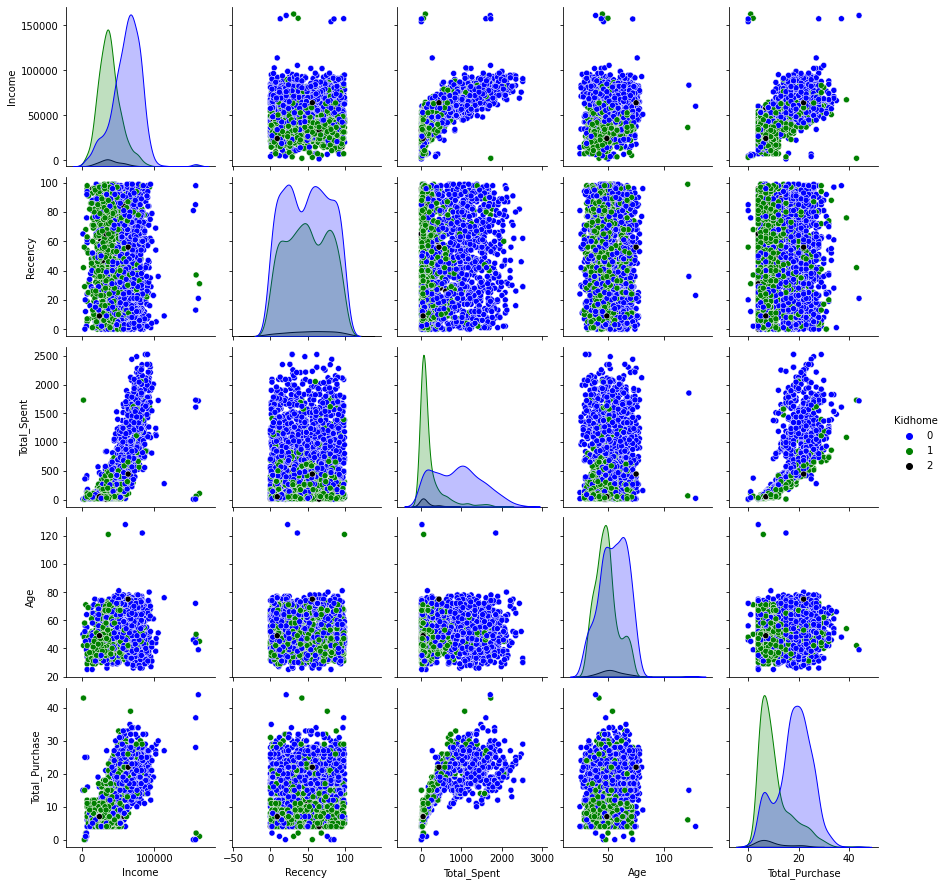

In [ ]:
features = [ "Income", "Recency", "Total_Spent", "Age", "Total_Purchase", "Kidhome"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[features], hue= "Kidhome",palette= (["Blue","Green", "Black"]))
plt.show()

### Scatterplot

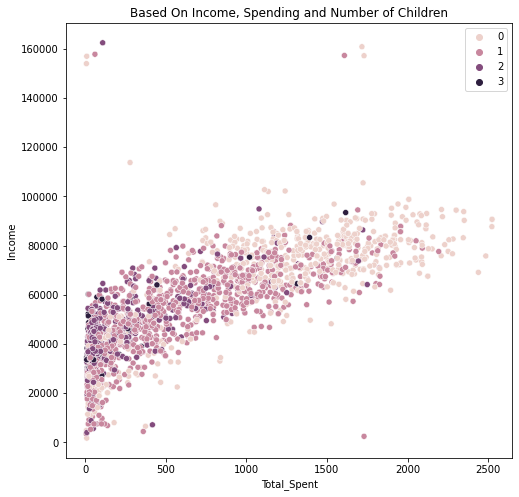

In [ ]:
plt.figure(figsize=(8,8)) 
pl = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"], hue=df["Total_Children"])
pl.set_title("Based On Income, Spending and Number of Children")
plt.legend()
plt.show()

##Correlation


In [ ]:
X = df["Total_Spent"]
y = df["Income"]
X1 = X - X.mean()
y1 = y - y.mean()
cov = np.mean(X1*y1)
Std_X = np.std(X1)
Std_y = np.std(y1)
corr = cov / (Std_X*Std_y)
print("Correlation = ", corr)

Correlation =  0.792650283362204


##Measures of Error & Variability

In [ ]:
w1 = corr*(Std_y/Std_X)
w0 = np.mean(y) - w1*np.mean(X)
pred = w0 + w1 * X
n = y.size 
k = 1
predsize = pred.size

SST = np.sum(np.square(y-y.mean()))
SSR = np.sum(np.square(pred-y.mean()))
SSE = np.sum(np.square(pred-y[0:predsize]))
MSE = np.mean(np.square(pred - y[0:predsize]))
RMSE = np.sqrt(MSE)
rSquared = 1 - (SSE/SST)
adjrSquared = 1 - ((1 - rSquared)*(n - 1)/(n-k-1))

dictionary = {
     'SST' : SST,
     'SSR' : SSR,
     'SSE' : SSE,
     'MSE' : MSE,
     'RMSE' : RMSE,
     'R-squared' : rSquared,
     'Adjusted R-squared' : adjrSquared
     }
dictionary

{'Adjusted R-squared': 0.6281265071736123,
 'MSE': 172164059.36941108,
 'R-squared': 0.6282944717141843,
 'RMSE': 13121.130262649292,
 'SSE': 381343391503.24634,
 'SSR': 644585367915.1992,
 'SST': 1025928759418.4497}

# Problem 2

In [ ]:
class SimpleLinearRegression():
  def correlation(self, X, y):
    self.X1 = X - X.mean()
    self.y1 = y - y.mean()
    cov = np.mean(self.X1*self.y1)
    self.Std_X = np.std(self.X1)
    self.Std_y = np.std(self.y1)
    self.corr = cov / (self.Std_X*self.Std_y)
    return print("Correlation = ", self.corr)

  def train(self, X, y):
    self.w1 = self.corr*(self.Std_y/self.Std_X)
    self.w0 = np.mean(y) - self.w1*np.mean(X)
    return print("w0: = {}  \nw1: = {}".format(self.w0, self.w1))

  def predict(self, X):
    self.pred = self.w0 + self.w1 * X
    return self.pred

  def evaluate(self):
    n = y.size 
    k = 1
    self.predsize = self.pred.size

    SST = np.sum(np.square(y-y.mean()))
    SSR = np.sum(np.square(self.pred-y.mean()))
    SSE = np.sum(np.square(self.pred-y[0:self.predsize]))
    MSE = np.mean(np.square(self.pred - y[0:self.predsize]))
    RMSE = np.sqrt(MSE)
    rSquared = 1 - (SSE/SST)
    adjrSquared = 1 - ((1 - rSquared)*(n - 1)/(n-k-1))

    dictionary = {
         'SST' : SST,
         'SSR' : SSR,
         'SSE' : SSE,
         'MSE' : MSE,
         'RMSE' : RMSE,
         'R-squared' : rSquared,
         'Adjusted R-squared' : adjrSquared
         }
    new_df = pd.DataFrame(dictionary.items(), columns=['Measures of Error', 'Value'])
    return new_df

  def visualize(self):
    plt.figure(figsize=(15,15))
    sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"], hue=df["Total_Children"])
    
    plt.plot(X, self.pred, color = "g")
    plt.xlabel('X')
    plt.ylabel('y')

In [ ]:
# data
X = df["Total_Spent"]
y = df["Income"]
regressor = SimpleLinearRegression()

In [ ]:
regressor.correlation(X,y)

Correlation =  0.792650283362204


In [ ]:
regressor.train(X,y)

w0: = 34782.606105036524  
w1: = 28.30009617581707


In [ ]:
regressor.predict(X)

0       80543.861621
1       35546.708702
2       56743.480737
3       36282.511202
4       46725.246691
            ...     
2235    72733.035077
2236    47347.848807
2237    69903.025459
2238    58639.587181
2239    39650.222647
Name: Total_Spent, Length: 2215, dtype: float64

In [ ]:
regressor.evaluate()

,Measures of Error,Value
0,SST,1.025929e+12
1,SSR,6.445854e+11
2,SSE,3.813434e+11
3,MSE,1.721641e+08
4,RMSE,1.312113e+04
5,R-squared,6.282945e-01
6,Adjusted R-squared,6.281265e-01


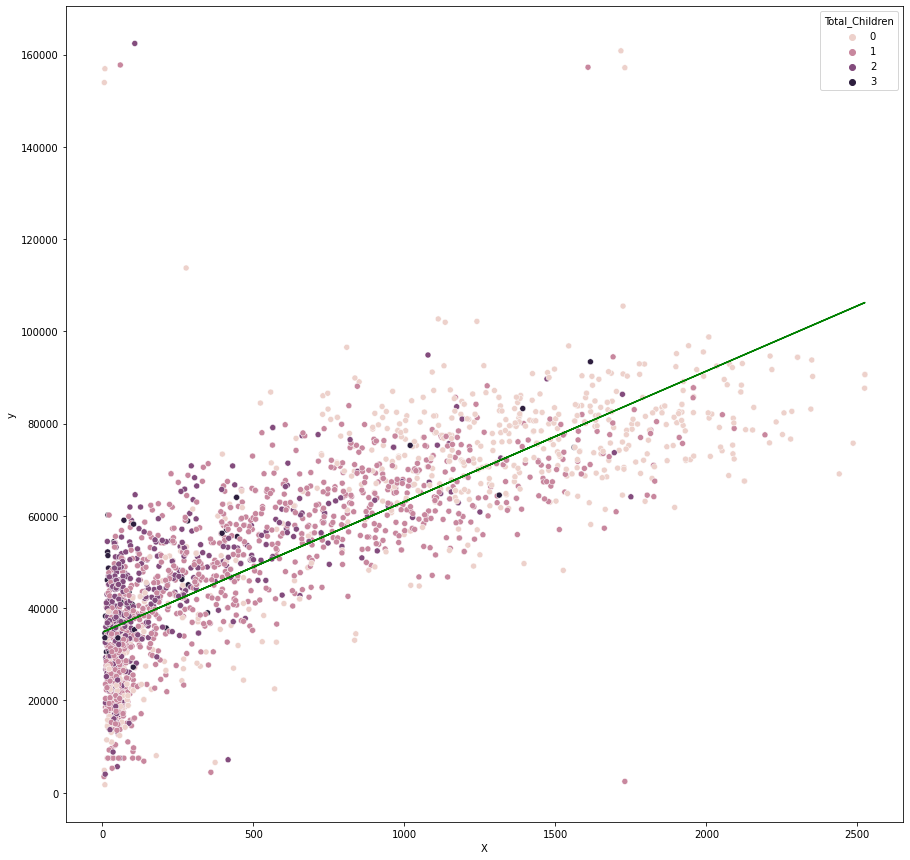

In [ ]:
regressor.visualize()

# Problem 3


##Meme here